In [1]:
state = 'ID' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 4 plans from file.


In [6]:
obj_type = 'average_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state ID, objective average_Polsby_Popper
####################################################################################################

L = 910358 and U = 928748

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 12, 19, 20, 21, 22, 34, 35, 38, 40, 41, 43], [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 39, 42]]
Objective value: 0.12727756662191336
Deviation: 0.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter La

User MIP start produced solution with objective 0.127277 (0.04s)
Loaded user MIP start with objective 0.127277

Presolve removed 792 rows and 523 columns
Presolve time: 0.01s
Presolved: 648 rows, 615 columns, 2468 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 569 integer (569 binary)

Root relaxation: objective 9.999990e-01, 111 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0    -    0.12728    1.00000   686%     -    0s
     0     0    1.00000    0    -    0.12728    1.00000   686%     -    0s
     0     0    0.99835    0   49    0.12728    0.99835   684%     -    0s
     0     0    0.99116    0   63    0.12728    0.99116   679%     -    0s
     0     0    0.98888    0   71    0.12728    0.98888   677%     -    0s
     0     0    0.98878    0   67    0.12728    0.98878   6

H  584   269                       0.2897143    0.71272   146%  60.6    0s
H  589   269                       0.2897148    0.71272   146%  60.7    0s
*  712   294              17       0.2968740    0.68289   130%  62.0    0s
H  740   294                       0.3007793    0.68289   127%  61.4    1s
H  854   281                       0.3011603    0.66462   121%  64.4    1s
H  881   276                       0.3011608    0.66462   121%  64.8    1s
H 1113   217                       0.3046865    0.63836   110%  69.0    1s
H 1183   190                       0.3047733    0.63335   108%  69.3    1s
H 1249   195                       0.3086791    0.45993  49.0%  69.0    1s
H 1294   195                       0.3106318    0.41852  34.7%  67.7    1s
H 1304   195                       0.3107824    0.39421  26.8%  67.6    1s
H 1319   185                       0.3107829    0.39421  26.8%  67.7    1s
H 1337   185                       0.3107834    0.39421  26.8%  67.4    1s
H 1359   185             


Solution count 10: 0.301161 0.30116 0.30116 ... 0.300902
No other solutions better than 0.301161

Optimal solution found (tolerance 0.00e+00)
Best objective 3.011608123779e-01, best bound 3.011608123779e-01, gap 0.0000%

User-callback calls 5475, time in user-callback 0.11 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 6, 11, 12, 15, 21, 28, 35], [0, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]]

****************************************
Trying deviation = 2364.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 12, 19, 20, 21, 22, 34, 35, 38, 40, 41, 43], [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 39, 42]]
Objective value: 0.12727756662191336
Deviation: 0.0

*************************************

Presolve time: 0.00s
Presolved: 648 rows, 615 columns, 2468 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 569 integer (569 binary)

Root relaxation: objective 9.999990e-01, 111 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0    -    0.12728    1.00000   686%     -    0s
     0     0    1.00000    0    -    0.12728    1.00000   686%     -    0s
     0     0    0.99778    0   49    0.12728    0.99778   684%     -    0s
     0     0    0.99093    0   45    0.12728    0.99093   679%     -    0s
     0     0    0.98874    0   64    0.12728    0.98874   677%     -    0s
     0     0    0.97109    0   72    0.12728    0.97109   663%     -    0s
     0     0    0.97093    0   76    0.12728    0.97093   663%     -    0s
     0     0    0.97066    0   76    0.12728    0.97066   663% 

H11124  1051                       0.2624760    0.28034  6.80%  39.1    4s
 14870  1081    0.27374   26  119    0.26248    0.27892  6.26%  35.4    5s

Cutting planes:
  Learned: 1
  MIR: 4
  Flow cover: 2
  Zero half: 3
  RLT: 36
  Lazy constraints: 2

Explored 31191 nodes (908765 simplex iterations) in 7.66 seconds (4.95 work units)
Thread count was 20 (of 20 available processors)

Solution count 10: 0.262476 0.262187 0.259257 ... 0.238394
No other solutions better than 0.262476

Optimal solution found (tolerance 0.00e+00)
Best objective 2.624759674072e-01, best bound 2.624759674072e-01, gap 0.0000%

User-callback calls 63621, time in user-callback 0.30 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 2, 3, 5, 10, 11, 15, 16, 18, 19, 20, 25, 28, 29, 33, 34, 35, 38, 41, 43], [0, 4, 6, 7, 8, 9, 12, 13, 14, 17, 21, 22, 23, 24, 26, 27, 30, 31, 32, 36, 37, 39, 40, 42]]

*************************************

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   29    0.12728    1.00000   686%     -    0s
     0     0    0.99239    0   68    0.12728    0.99239   680%     -    0s
     0     0    0.97474    0   61    0.12728    0.97474   666%     -    0s
     0     0    0.97474    0   59    0.12728    0.97474   666%     -    0s
     0     0    0.97173    0   80    0.12728    0.97173   663%     -    0s
     0     0    0.97143    0   80    0.12728    0.97143   663%     -    0s
     0     0    0.97043    0   83    0.12728    0.97043   662%     -    0s
     0     0    0.97001    0   83    0.12728    0.97001   662%     -    0s
     0     0    0.96969    0   90    0.12728    0.96969   662%     -    0s
     0     0    0.96955    0   90    0.12728    0.96955   662%     -    0s
     0     0    0.96955    0   90    0.12728    0.96955   662%     -    0s
     0     0    0.96892    0   90    0.12728    0.96892   661%     -    0s
     0     0    0.9689

     0     0    0.96503    0  112    0.12728    0.96503   658%     -    0s
     0     2    0.96462    0  112    0.12728    0.96462   658%     -    0s
 20818  6629    0.14548   62   56    0.12728    0.30833   142%  26.5    5s
 58155 10210    0.23412   51   44    0.12728    0.24912  95.7%  24.1   10s
 90774 17705    0.21479   55   25    0.12728    0.24643  93.6%  23.9   15s
 121249 24895 infeasible   57         0.12728    0.24449  92.1%  23.3   20s
 150805 30995 infeasible   53         0.12728    0.24213  90.2%  22.9   25s
 178974 31906 infeasible   63         0.12728    0.23077  81.3%  23.1   30s
 201504 34894    0.21314   62   27    0.12728    0.21838  71.6%  23.7   35s
 225625 37300    0.21549   56   26    0.12728    0.21664  70.2%  23.4   40s
 251504 40659    0.21525   47   78    0.12728    0.21533  69.2%  23.4   45s
 277412 43160    0.14705   63   32    0.12728    0.21411  68.2%  23.4   50s
 300445 43690 infeasible   60         0.12728    0.21248  66.9%  23.5   55s
 320140 43512    

 1371837 21565 infeasible   58         0.13369    0.14905  11.5%  18.9  495s
 1380797 19487     cutoff   55         0.13369    0.14905  11.5%  18.9  500s
 1388445 17198    0.13773   59   18    0.13369    0.14905  11.5%  18.8  505s
 1396421 14902    0.13887   54   23    0.13369    0.14905  11.5%  18.8  510s
 1404898 12796    0.13909   71   24    0.13369    0.14905  11.5%  18.8  515s
 1410977 10749    0.13883   57   27    0.13369    0.14905  11.5%  18.8  520s
 1420203  8047    0.13724   58   55    0.13369    0.14905  11.5%  18.8  525s
 1429056  4906    0.13772   58   25    0.13369    0.14905  11.5%  18.7  530s
 1438969  1296 infeasible   88         0.13369    0.14905  11.5%  18.7  536s

Cutting planes:
  Lazy constraints: 110

Explored 1443883 nodes (26942790 simplex iterations) in 538.64 seconds (124.17 work units)
Thread count was 20 (of 20 available processors)

Solution count 10: 0.133688 0.133056 0.129006 ... 0.120383
No other solutions better than 0.133688

Optimal solution found (

 215846 46208    0.15236   50   42    0.12728    0.23422  84.0%  21.1  125s
 224899 47112 infeasible   53         0.12728    0.22798  79.1%  21.2  130s
 235807 48167    0.18684   45   43    0.12728    0.21875  71.9%  21.4  135s
 247970 49614    0.21596   49   59    0.12728    0.21804  71.3%  21.5  140s
 259229 50485    0.21614   45   48    0.12728    0.21741  70.8%  21.3  145s
 269585 51040    0.21527   49   86    0.12728    0.21693  70.4%  21.3  150s
 279002 51880 infeasible   44         0.12728    0.21629  69.9%  21.3  155s
 289802 52957    0.15541   54   36    0.12728    0.21570  69.5%  21.4  160s
 301420 53812 infeasible   49         0.12728    0.21513  69.0%  21.5  165s
 313576 54590 infeasible   49         0.12728    0.21452  68.5%  21.5  170s
 324605 55421    0.12780   49   52    0.12728    0.21383  68.0%  21.6  175s
 339462 55614    0.14008   54   63    0.12728    0.21271  67.1%  21.5  180s
 349798 55814 infeasible   54         0.12728    0.21099  65.8%  21.5  185s
 361725 5658

 1321127 111481    0.15435   49   37    0.12728    0.17284  35.8%  17.8  660s
 1327248 111721 infeasible   59         0.12728    0.17284  35.8%  17.8  665s
 1338060 111956 infeasible   49         0.12728    0.17284  35.8%  17.8  671s
 1345133 112253 infeasible   53         0.12728    0.17284  35.8%  17.8  676s
 1351411 112499    0.15348   44   26    0.12728    0.17284  35.8%  17.7  681s
 1360312 112686 infeasible   56         0.12728    0.17284  35.8%  17.7  685s
 1368036 112936    0.15532   46   16    0.12728    0.17284  35.8%  17.7  692s
 1374836 112848 infeasible   52         0.12728    0.17284  35.8%  17.7  695s
 1384294 113084 infeasible   52         0.12728    0.17284  35.8%  17.7  700s
 1392376 113560    0.13969   48   42    0.12728    0.17284  35.8%  17.7  705s
 1403815 113800    0.15362   48   29    0.12728    0.17284  35.8%  17.6  710s
 1411168 113821    0.15445   50   25    0.12728    0.17284  35.8%  17.6  715s
 1418717 113827    0.15484   48   20    0.12728    0.17284  35.8

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state ID,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[1, 5, 12, 19, 20, 21, 22, 34, 35, 38, 40, 41, 43], [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 39, 42]], [[1, 5, 10, 15, 16, 18, 19, 20, 22, 26, 29, 30, 33, 34, 38, 43], [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 17, 21, 23, 24, 25, 27, 28, 31, 32, 35, 36, 37, 39, 40, 41, 42]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 21, 35, 41], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43]], [[1, 2, 3, 5, 10, 11, 15

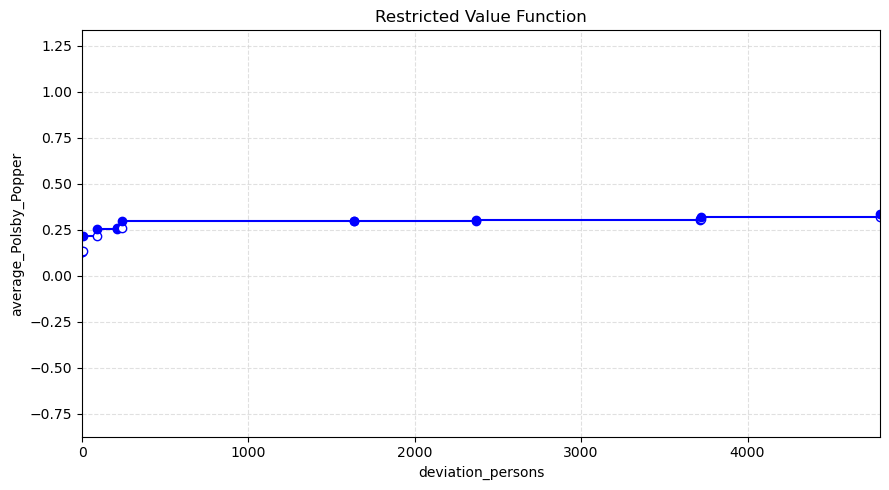

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors) 


####################################################################################################
Pareto maps for state ID, objective average_Polsby_Popper
####################################################################################################



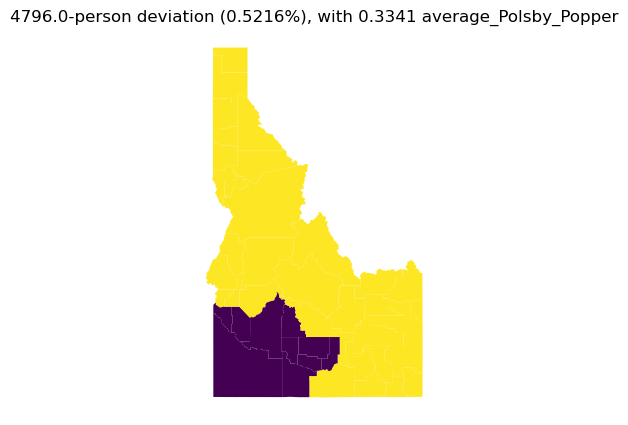

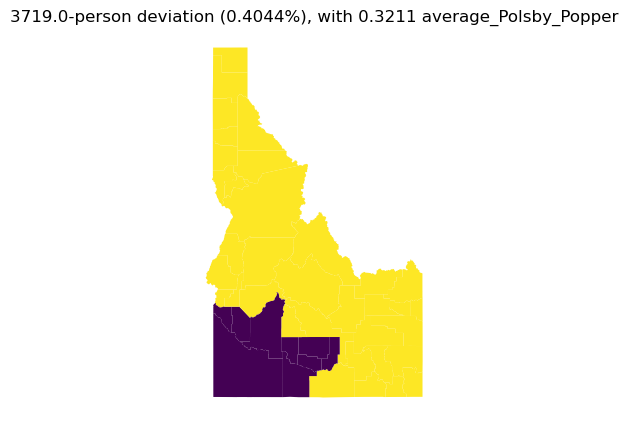

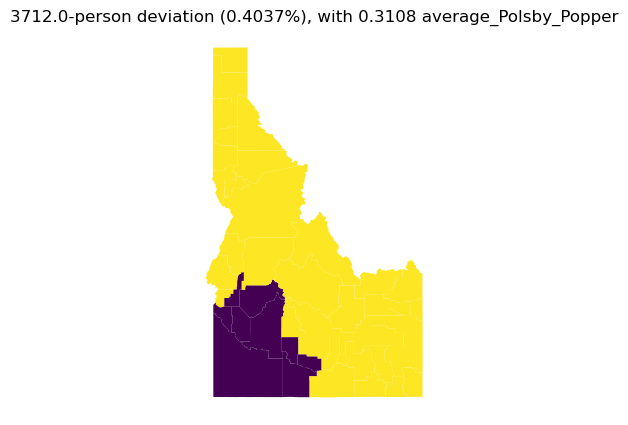

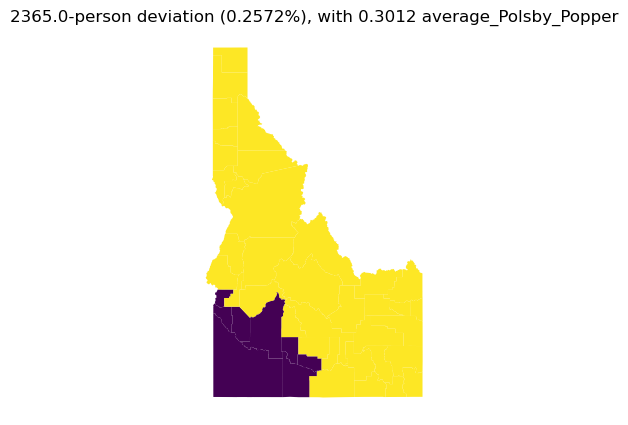

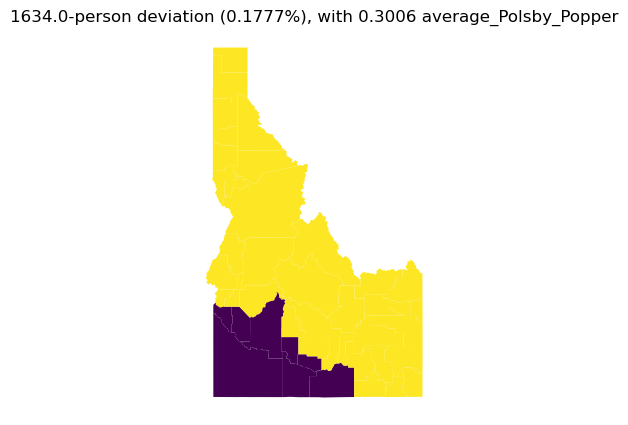

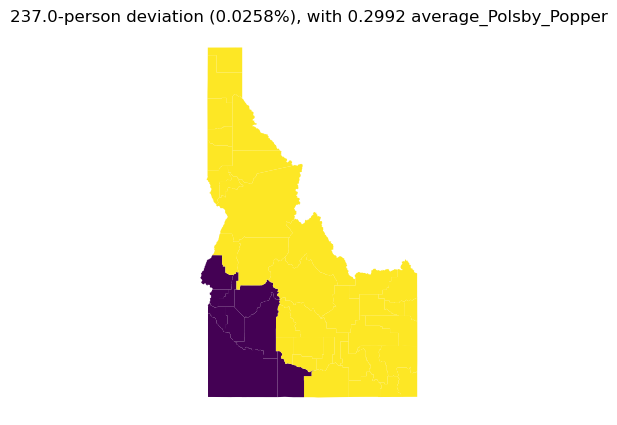

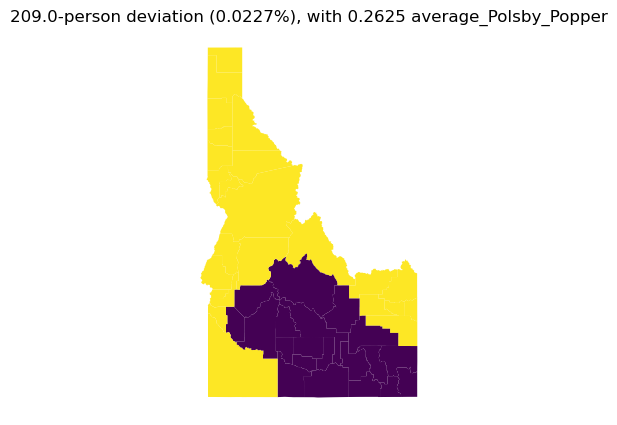

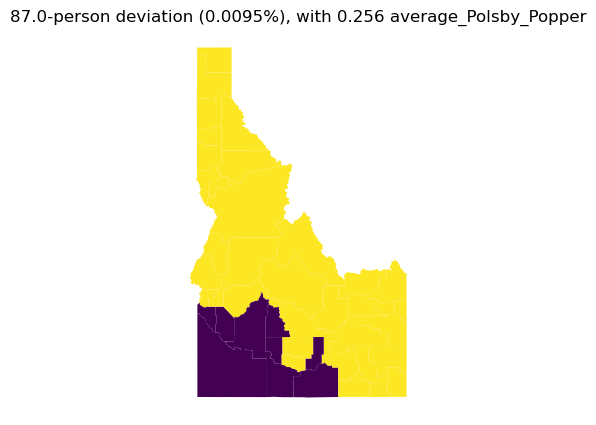

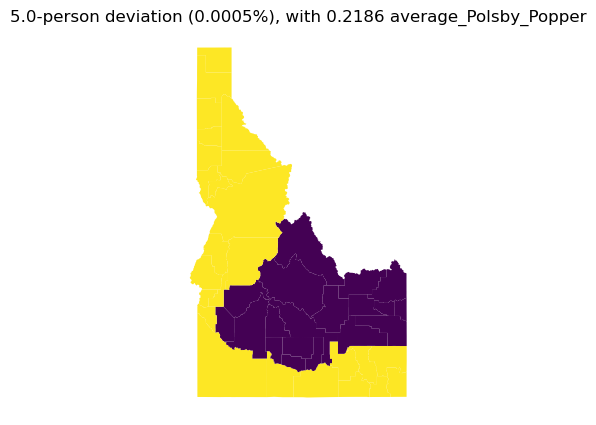

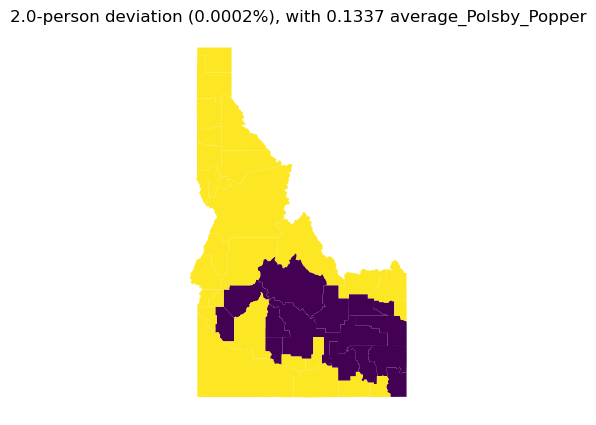

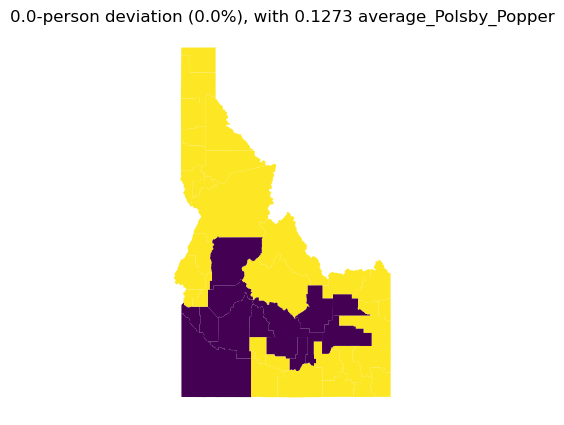

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)